Nolan Roth <br>
PHYS434 <br>

# Lab #3

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
from scipy.stats import norm
from astropy.table import QTable, Table, Column
from astropy import units as u
import numpy as np

plt.rcParams["figure.figsize"] = (15, 10)

## Problem 1

We are given a normal distribution with some 'bad' data points that we want to remove. Plotting the normal distribution with $\mu$ = 12 and $\sigma$ = 0.4 on top of histogram of the data given:

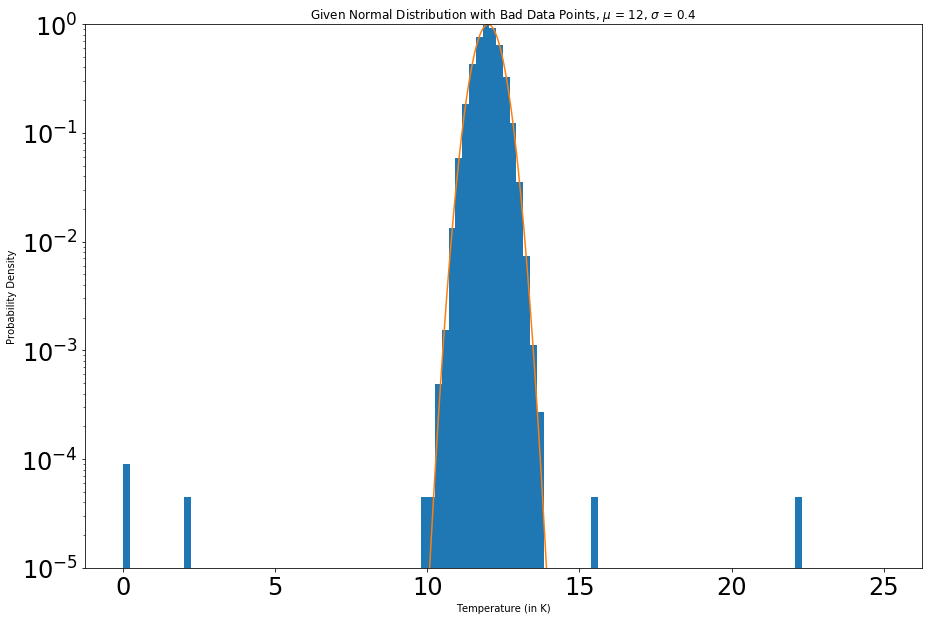

In [126]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
x = np.linspace(0, 25, 1000)
plt.plot(x, stats.norm.pdf(x, 12, 0.4))
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.ylim(10e-6, 1)
plt.xlabel('Temperature (in K)')
plt.ylabel('Probability Density')
plt.title('Given Normal Distribution with Bad Data Points, $\mu$ = 12, $\sigma$ = 0.4')
plt.show()

Statistical question: Which data points should we throw out due to a very low probability of occuring? I am choosing this statistical question because we are given a normal distribution with 'bad' data points. These data points would likely not be included in our experiment if there were no errors, so we want to identify the data points that are due to error and eliminate them.

Question in math: Integrating under the normal distribution pdf, which data points have have a probability of less than 1$\sigma$, 3$\sigma$, and 5$\sigma$?

Truth table for this question before removing any values:

In [12]:
t1 = QTable()
t1[' '] = ['Committed', 'Omitted']
t1['Good Values'] = [10000, 0]
t1['Bad Values'] = [8, 0]
t1

,Good Values,Bad Values
str9,int64,int64
Committed,10000,8
Omitted,0,0


I will start with a statistical threshold of 1$\sigma$ and remove all values with a sigma value greater than 1:

In [74]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
i = 0
removed_values = []
while i < len(d):
    if d[i] >= 12.0:
        prob = 1 - stats.norm.cdf(d[i], 12, 0.4)
    elif d[i] < 12.0:
        prob = stats.norm.cdf(d[i], 12, 0.4)
    sigma = stats.norm.ppf(prob)
    if abs(sigma) > 1:
        removed_values.append(d[i])
        d = np.delete(d, i)
        i-=1
    i+=1
print('Omitted values: ' + str(len(removed_values)))
print('Min committed, max committed: '+ str(min(d)) + ', ' + str(max(d)))

Omitted values: 31477
Min committed, max committed: 11.600007079123978, 12.399985668242302


Doing the same thing with threshold of 3$\sigma$:

In [75]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
i = 0
removed_values = []
while i < len(d):
    if d[i] >= 12.0:
        prob = 1 - stats.norm.cdf(d[i], 12, 0.4)
    elif d[i] < 12.0:
        prob = stats.norm.cdf(d[i], 12, 0.4)
    #sigma = stats.norm.ppf(prob)
    sigma = stats.norm.ppf(prob)
    if abs(sigma) > 3:
        removed_values.append(d[i])
        d = np.delete(d, i)
        i-=1
    i+=1
print('Omitted values: ' + str(len(removed_values)))
print('Min committed, max committed: ' + str(min(d)) + ', ' + str(max(d)))

Omitted values: 281
Min committed, max committed: 10.801719004028568, 13.199715531939765


Doing the same thing with threshold of 5$\sigma$:

In [76]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
i = 0
removed_values = []
while i < len(d):
    if d[i] >= 12.0:
        prob = 1 - stats.norm.cdf(d[i], 12, 0.4)
    elif d[i] < 12.0:
        prob = stats.norm.cdf(d[i], 12, 0.4)
    #sigma = stats.norm.ppf(prob)
    sigma = stats.norm.ppf(prob)
    if abs(sigma) > 5:
        removed_values.append(d[i])
        d = np.delete(d, i)
        i-=1
    i+=1
print('Omitted values: ' + str(len(removed_values)))
print('Min committed, max committed: ' + str(min(d)) + ', ' + str(max(d)))

Omitted values: 6
Min committed, max committed: 10.226752395587777, 13.766042987456931


Using the number of omitted values and the minimum and maximum committed values, I can figure out how many 'good' and 'bad' data points were committed and use that information to construct truth tables for each statistical threshold:

Truth table for threshold of 1$\sigma$:

In [83]:
t2 = QTable()
t2[' '] = ['Committed', 'Omitted']
t2['Good Values'] = [68531, 31469]
t2['Bad Values'] = [0 , 8]
t2

,Good Values,Bad Values
str9,int64,int64
Committed,68531,0
Omitted,31469,8


Truth table for threshold of 3$\sigma$:

In [84]:
t3 = QTable()
t3[' '] = ['Committed', 'Omitted']
t3['Good Values'] = [99726, 274]
t3['Bad Values'] = [1 , 7]
t3

,Good Values,Bad Values
str9,int64,int64
Committed,99726,1
Omitted,274,7


Truth table for threshold of 5$\sigma$:

In [86]:
t4 = QTable()
t4[' '] = ['Committed', 'Omitted']
t4['Good Values'] = [99998, 2]
t4['Bad Values'] = [2 , 6]
t4

,Good Values,Bad Values
str9,int64,int64
Committed,99998,2
Omitted,2,6


If I lower the statistical threshold, I increase the number of omissions, both 'good' and 'bad'. Likewise, raising the statistical threshold increases the number of commissions, both 'good' and 'bad'. The number of total omissions is a predictable value that follows the 68-95-99.7 rule, but the exact number of omitted 'bad' values is not a predictable value.

There are mistakes of commission at thresholds of 3$\sigma$ and 5$\sigma$, but not at 1$\sigma$. The number of commissions of 'bad' data increases as we raise the statistical threshold. Committing only 'good' data points and no 'bad' data points is not possible with this data set, as there is overlap between the 'good' data points and 'bad' data points.

We can see there is a tradeoff between 'good' data commissions and 'bad' data commissions. Increasing the threshold increases the number of 'good' data commissions, but decreases the number of 'bad' data omissions.

## Problem 2

The question in words: What distance in the 2D distribution gives us a sigificance of 5$\sigma$?

The question in math: What pdf describes the background in distance and what value of that background corresponds to a probability of 5$\sigma$? 

Plotting the two-dimensional distribution:

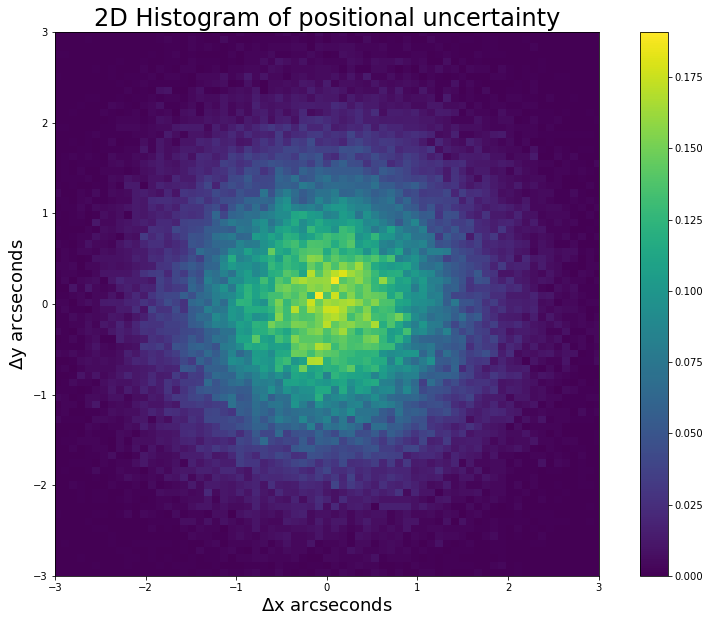

In [129]:
a = np.vstack((stats.norm.rvs(scale = 1, size = 100000), stats.norm.rvs(scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)
plt.show()

Both x and y follow standard normal distributions, but we want a distribution according to sqrt(x^2 + y^2).The square of a standard normal distribution is a chi-square distribution, and the sum of two chi-square distributions is a chi-square distribution with two degrees of freedom.

A chi-square distribution with two degrees of freedom is equal to a Rayleigh distribution, so we can use a Rayleigh distribution to describe our distance distribution.

We can confirm this by plotting both the distribution of (x^2 +y^2)^(1/2) and a Rayleigh distribution:

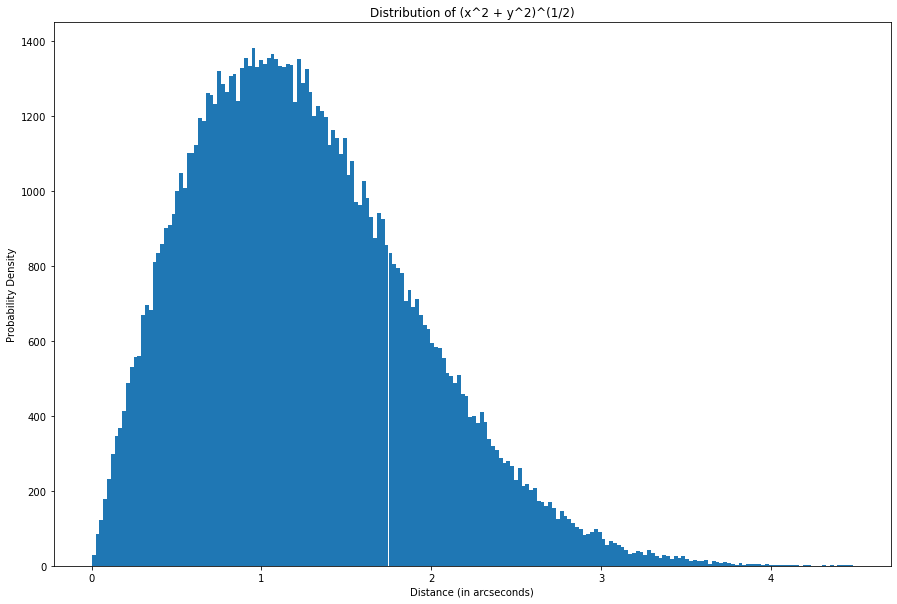

In [138]:
x = stats.norm.rvs(scale = 1, size = 100000) 
y = stats.norm.rvs(scale = 1, size = 100000)
z = (x**2 + y**2) ** (1/2)
fig, ax3 = plt.subplots(1, 1)
ax3.hist(z, 200)
plt.title('Distribution of (x^2 + y^2)^(1/2)')
plt.xlabel('Distance (in arcseconds)')
plt.ylabel('Probability Density')
plt.show()

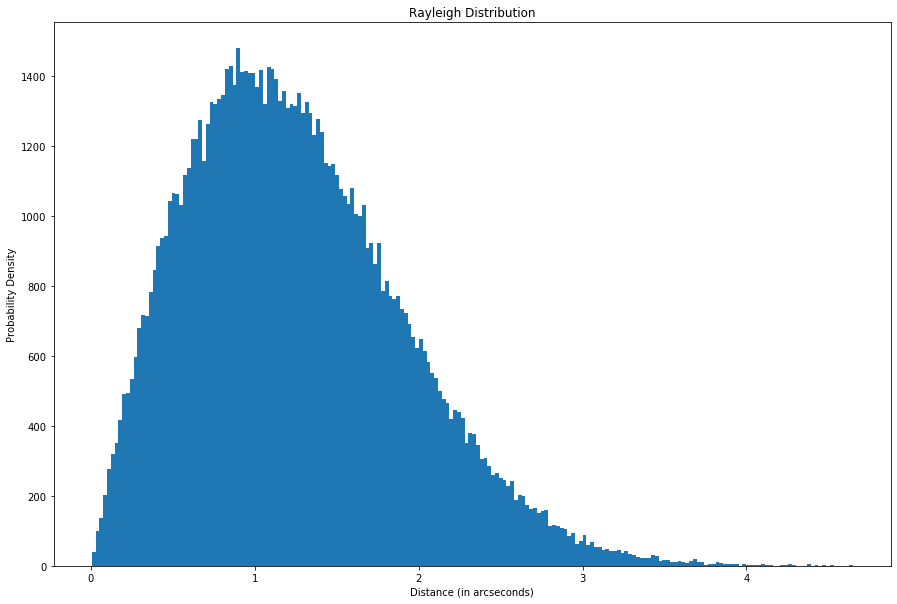

In [137]:
fig, ax5 = plt.subplots(1, 1)
ray = stats.rayleigh.rvs(loc = 0, scale = 1, size = 100000)
ax5.hist(ray, 200)
plt.title('Rayleigh Distribution')
plt.xlabel('Distance (in arcseconds)')
plt.ylabel('Probability Density')
plt.show()

Comparing the two plots, we can see the distributions are approximately equal. The distance that represents a 5$\sigma$ detection of motion is the value of x of the Rayleigh distribution for which the probability is equal to the probability of 5$\sigma$ on a standard normal distribution:

In [121]:
prob = 1 - stats.norm.cdf(5)
distance = stats.rayleigh.ppf(1 - prob)
print('Distance for 5 sigma detection of motion = ' + str(distance))

Distance for 5 sigma detection of motion = 5.489079776034238


So a distance of 5.489 arcseconds corresponds to a 5$\sigma$ detection of motion.

## Problem 3

Question in words: What is the probability of measuring 6800 cosmic rays over a 15 day period?

Question in math: The background distribution is a Poisson with an expected value of 1 cosmic ray per minute. Over an 8 hour period, this is the same as a poisson distribution with an expected value of 480 cosmic rays. In order to get the probability of finding 6800 over 15 days, we must sum the Poisson with $\mu$ = 480 over 15 days, then integrate from 0 to 6800 to get the probability.

We can observe the moon for 8 hours each night, and we have an expectation value of 1 cosmic ray per minute. Over the course of 8 hours, the expectation value becomes 480 cosmic rays for 8 hours. Plotting the Poisson distribution for a single night:

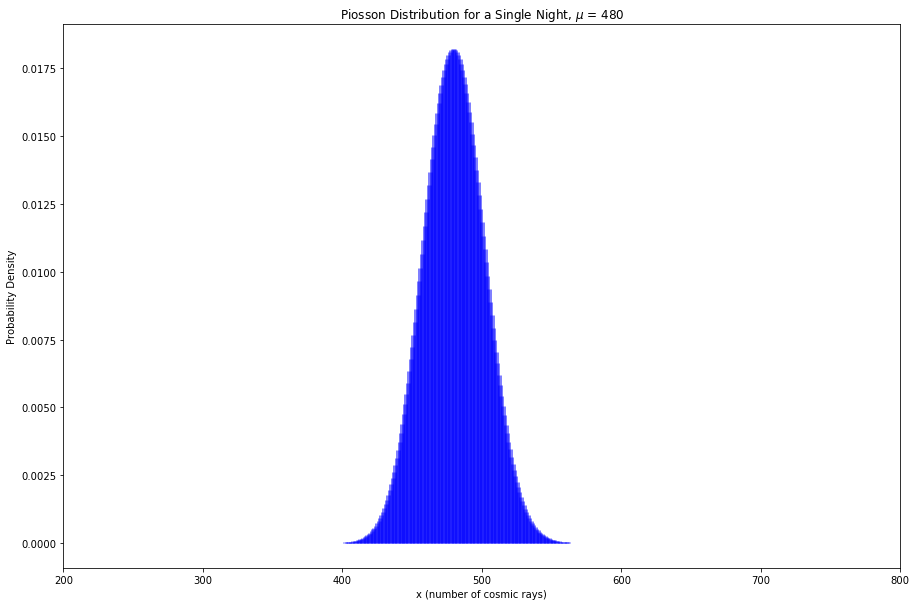

In [139]:
mu = 480
x = np.arange(0,1000)
y = stats.poisson.pmf(x, mu)
plt.vlines(x, 0, y, colors='b', lw=5, alpha=0.5)
plt.title('Piosson Distribution for a Single Night, $\mu$ = 480')
plt.xlabel('x (number of cosmic rays)')
plt.ylabel('Probability Density')
plt.xlim(200, 800)
plt.show()

Now, we want to sum over 15 days:

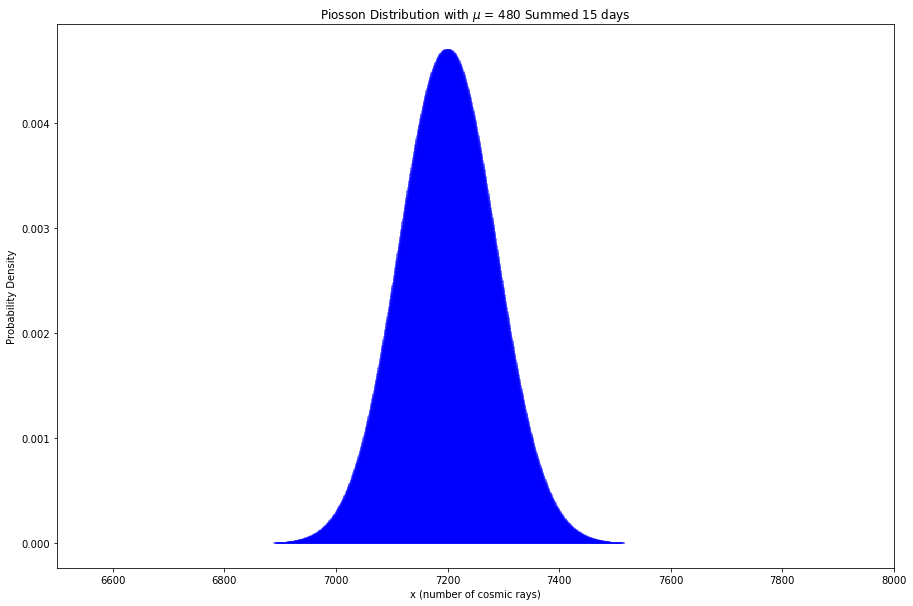

In [140]:
r = y
for i in range(14):
    r = signal.fftconvolve(r, y)
plt.vlines(np.arange(len(r)), 0, r, colors='b', lw=5, alpha=0.5)
plt.title('Piosson Distribution with $\mu$ = 480 Summed 15 days')
plt.xlabel('x (number of cosmic rays)')
plt.ylabel('Probability Density')
plt.xlim(6500, 8000)
plt.show()

We would expect this to be the same as a Poisson distribution with a mean value of 480 * 15 = 7200. Plotting the Poisson distribution with $\mu$ = 7200, we can see that they are the same:

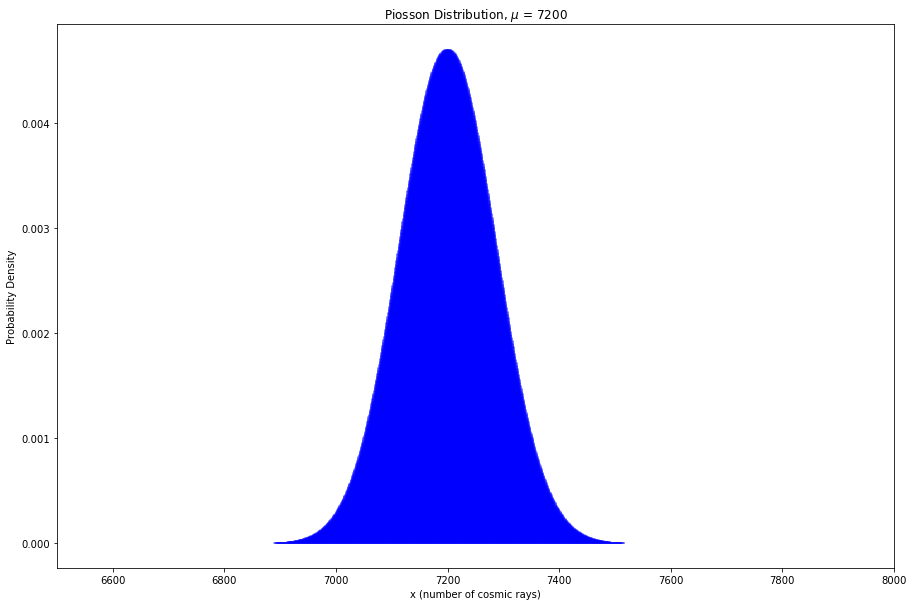

In [141]:
mu = 7200
x = np.arange(len(r))
y = stats.poisson.pmf(x, mu)
plt.vlines(x, 0, y, colors='b', lw=5, alpha=0.5)
plt.title('Piosson Distribution, $\mu$ = 7200')
plt.xlabel('x (number of cosmic rays)')
plt.ylabel('Probability Density')
plt.xlim(6500, 8000)
plt.show()

So our background pdf is a Poisson distribution with $\mu$ = 7200. We can integrate that from 0 to 6800 to find the significance of our measurement.

In [32]:
prob = stats.poisson.cdf(6800, 7200)
print('Probability = ' + str(prob))
sigma = stats.norm.ppf(prob)
print('Sigma = ' + str(sigma))

Probability = 1.0133280183917768e-06
Sigma = -4.750747965777188


So the significance of our moon shadow detection is 4.7507$\sigma$, the minus sign indicating that the value lies to the left of the mean.

Although this measurement seems fairly significant, it is not significant enough to be labeled a discovery, as it is less than 5$\sigma$.